Sor far what we have done untill Now includes this Steps:
1. collected Data From IMDB Top 250 Movies 
2. Save data as 5 tables in CSV file
3. Created a Database with Python library MySQL connector

Now we wanna visulize our Data and Create a Dashboard with "Streamlit"

# import libraries

In [8]:
import streamlit as st
from pathlib import Path
import pandas as pd
import mysql.connector
from mysql.connector import errorcode
import matplotlib.pyplot as plt 
import numpy as np
import altair as alt
import warnings
warnings.filterwarnings('ignore')

# Connect python to MySQL 

In [4]:
cnx = mysql.connector.connect(
    user="fateme_mousavi",
    host="127.0.0.1", 
    password="FMousavi11121375",
)
cursor = cnx.cursor()

In [5]:
DB_NAME = 'IMDB'
cursor = cnx.cursor()
cursor.execute(f'USE {DB_NAME}')

lets Start creating Dashboard

In [6]:
st.set_page_config(
    page_title='Streamlit Assignment',
    page_icon= ':snake:'
)
base_path = Path().absolute() 

# Set main page title

In [9]:
st.title(" Advenced python Assignment ") 

DeltaGenerator()

Create first table that user could fillter data by year column and Show movie table

# Step 1: Create Dynamic Table in Streamlit

In [12]:
#Table title
st.subheader('filtered data by year column')

#set two search box for Both ends of the time period
searchcheckbox_year1 = st.checkbox("initial year",value = False, key=1) 
searchcheckbox_year2 = st.checkbox("final year",value = False, key=2) 

Set condition based on searchbox input

In [13]:
if searchcheckbox_year1:
    start = st.number_input("initial year",min_value=1921,max_value=2023)

else:
    start  =''


if searchcheckbox_year2:   
    end_year = st.number_input("final year",min_value=1921,max_value=2023)
else:
    end_year =''


# Write Query and Create table in Streamlit with user input values

In [14]:
if st.button("search"):

    if searchcheckbox_year1 and searchcheckbox_year2:
        # if inite year is specified but not the final year
        if start != '' and end_year == '':
            st.warning('Please enter final year of period')

        elif start == '' and end_year != '':
            st.warning('Please enter initial year of period')
        # if both  are specified
        elif start != '' and end_year != '':
            
            query=("select * from movie where year> %s and year< %s;")
            cursor.execute(query, (start, end_year))
            records = []
            for item in cursor.fetchall() :
                 records.append(item)
            df_year=pd.DataFrame(records)
            df_year.columns=['id','title','year','runtime','parental_guide','gross_us_canada'] 
            st.dataframe(df_year)
        # if user does not enter anything
        else:
            st.warning('Please enter two years')

# filter movie table by runtime 

In [16]:
# Selection for a specific runtime range.
st.subheader('filtered by runtime column')

searchcheckbox_runtime1 = st.checkbox("strat",value = False, key=3) 
searchcheckbox_runtime2 = st.checkbox("end",value = False, key=4) 

if searchcheckbox_runtime1:
    start_runtime = st.number_input("initial number",min_value=45,max_value=238)

else:
    start_runtime  =''


if searchcheckbox_runtime2:   
    end_runtime = st.number_input("final number",min_value=45,max_value=238)
else:
    end_runtime =''

if st.button("filtering"):

    if searchcheckbox_runtime1 and searchcheckbox_runtime2:
        
        if start_runtime != '' and end_runtime != '':
            if(start_runtime < end_runtime):
                query=("select * from movie where movie.runtime> %s and runtime< %s;")
                cursor.execute(query, (start_runtime, end_runtime))
                records = []
                for item in cursor.fetchall() :
                     records.append(item)
                df_year=pd.DataFrame(records)
                df_year.columns=['id','title','year','runtime','parental_guide','gross_us_canada'] 
                st.dataframe(df_year)
        else:
             st.warning("Invalid runtime Range - Re-enter numbers")

# select movie with specific actor/actress 

In [17]:

st.subheader('Movies one or more specific actor/actres palayed') 
names=st.text_input('Enter your names (with , between them)') 
names_li=names.split(',')
records = []
for name in names_li:
    query=("select movie.title AS `title`,person.name AS `name` from person JOIN cast ON person.id=cast.person_id JOIN movie ON cast.movie_id=movie.id where person.name=%s")
    cursor.execute(query,(name,))
    for item in cursor.fetchall() :
        records.append(item)
        
df_cast=pd.DataFrame(data=records,columns=['title','full_name'])
st.dataframe(df_cast) 


DeltaGenerator()

# movie with specified genre by user

In [18]:
st.subheader('Movie with specific genre') 
genre=st.text_input('Enter your genre') 

query=("select movie.title, genre.genre from movie JOIN genre ON movie.id=genre.movie_id where genre=%s;")
cursor.execute(query, (genre,))
records = []
for item in cursor.fetchall() :
    records.append(item)
    
df_genre=pd.DataFrame(data=records,columns=['title','genre'])
st.dataframe(df_genre) 

DeltaGenerator()

# Create static charts in Streamlit

set header for part 2 of Dashboard

In [20]:
st.subheader('Data analysis with static charts') 
st.text(" ")
st.text(" ")

DeltaGenerator()

Write a Query to select Top 10 Highest Grossing Movie

DeltaGenerator()

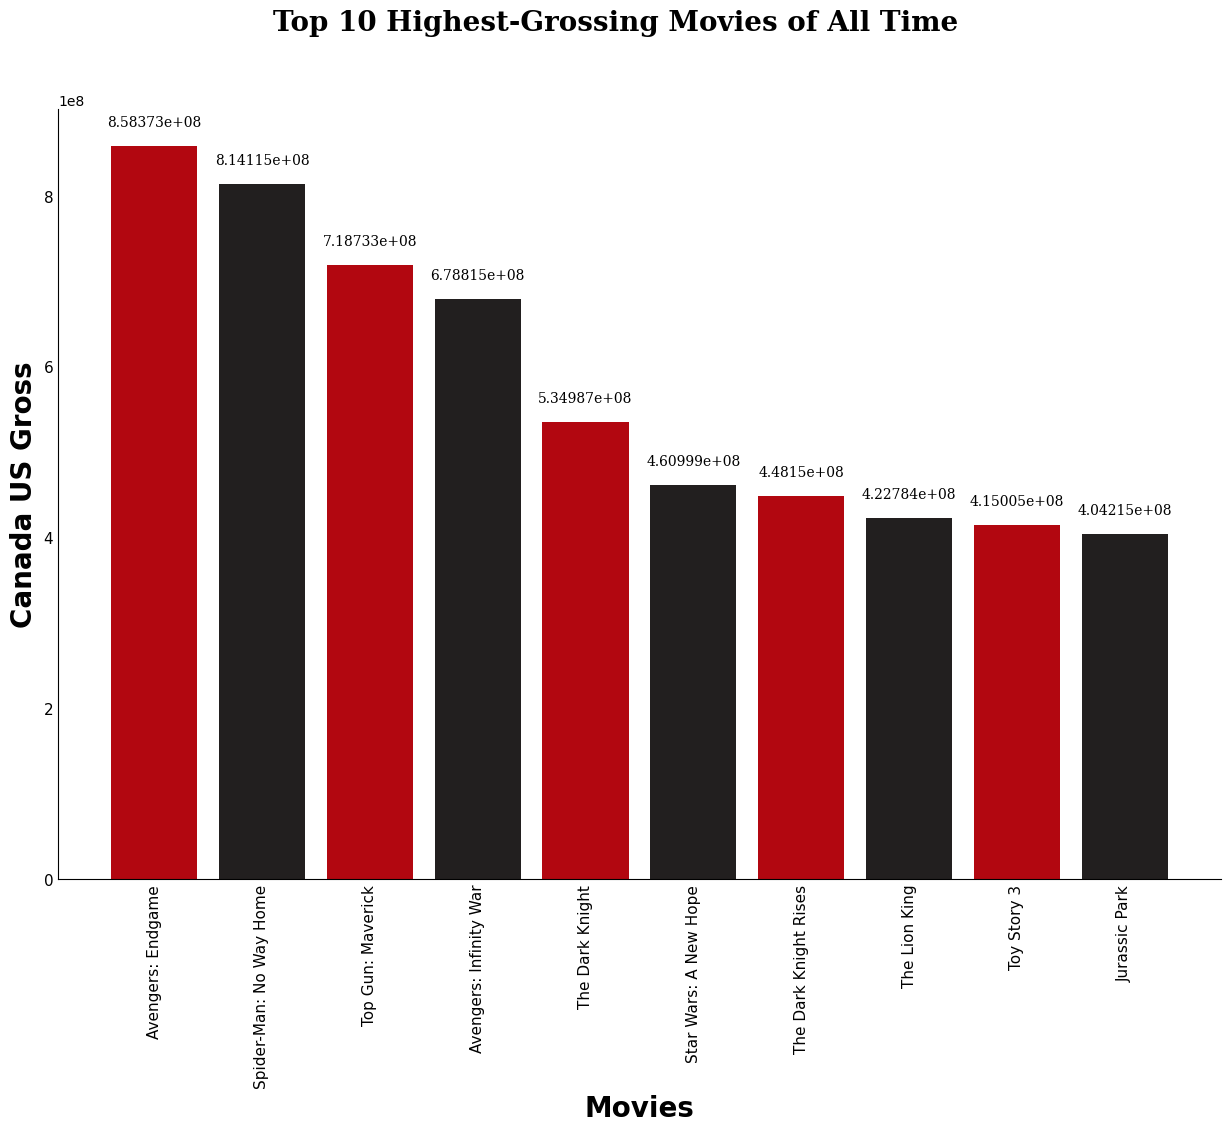

In [22]:
cursor.execute('select * from movie order by gross_us_canada DESC LIMIT 10;') 

#Save Query result as a list
records = []
for item in cursor.fetchall() :
    records.append(item) 
df=pd.DataFrame(records) 

#create a final DataFrame
df.loc[:,1]=df.loc[:,1].replace('Star Wars: Episode IV - A New Hope','Star Wars: A New Hope')

#Plot static charts with dataframe
y=list(df.loc[:,5])
x=list(df.loc[:,1]) 

colors=['#b20710','#221f1f']
fig1, ax1 = plt.subplots(figsize=(15,10))
bars=ax1.bar(x, y, color =colors,width=0.8)
ax1.spines[['top', 'right']].set_visible(False)
ax1.tick_params(tick1On=False,length=0,labelsize=11)
plt.rcParams["font.family"] = "serif"
for bars in ax1.containers:
    ax1.bar_label(bars,padding=12)
plt.xlabel('Movies', fontsize=20,fontweight='bold')
plt.ylabel('Canada US Gross', fontsize=20,fontweight='bold')   
fig1.suptitle('Top 10 Highest-Grossing Movies of All Time ',ha='center',fontweight='bold',fontsize=20)
plt.xticks(rotation =90)
st.pyplot(fig1) 

In [23]:
#Set two line Space between charts
st.text(" ")
st.text(" ")

DeltaGenerator()

write a Query for 5 actors/actress With The Most Movies On The IMDb Top 250 List

In [25]:
cursor.execute('select person.name,count(movie_id) AS cnt from cast JOIN person ON person.id=cast.person_id Group by name order by cnt DESC LIMIT 5;')
records = []
for item in cursor.fetchall() :
    records.append(item) 
df=pd.DataFrame(records) 

# Plot charts for new Query

In [28]:
x=list(df.loc[:,0])
y=list(df.loc[:,1]) 

colors=['#b20710','#221f1f']
fig2, ax2 = plt.subplots(figsize=(15,10))
bars=ax2.bar(x, y, color =colors,width=0.8)
ax2.spines[['top', 'right']].set_visible(False)
ax2.tick_params(tick1On=False,length=0,labelsize=15)
plt.rcParams["font.family"] = "serif"
for bars in ax2.containers:
    ax2.bar_label(bars,padding=20)
plt.xlabel('actor/actress', fontsize=20,fontweight='bold')
plt.ylabel('Movies Counter', fontsize=20,fontweight='bold')   
fig2.suptitle('5 actors/actress With The Most Movies On The IMDb Top 250 List',ha='center',fontweight='bold',fontsize=20)
st.pyplot(fig2)

DeltaGenerator()

In [29]:
#Set Two line Space between charts
st.text(" ")
st.text(" ")

DeltaGenerator()

# pie charts 

write a Query for Number of different genres for "IMDB's top 250 movies"

In [30]:
cursor.execute('select genre.genre,count(movie_id) AS cg from genre group by genre.genre order by cg DESC;')
records = []
for item in cursor.fetchall() :
    records.append(item)
df=pd.DataFrame(data=records)

# Plot pie chart with quries result

In [32]:
x=list(df.loc[:,0])
y=list(df.loc[:,1])
x = np.char.array(x)
percent=[]
explode = (0.1,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 
for i in y:
    per = 100 *(i/sum(y))
    percent.append(per) 
fig3, ax3 = plt.subplots(figsize=(8,6))
patches, texts = plt.pie(y,startangle=90,explode=explode,shadow=True, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
fig3.suptitle("Number of different genres for IMDB's top 250 movies", ha='center',fontweight='bold',fontsize=16)
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),fontsize=8)
st.pyplot(fig3) 

DeltaGenerator()

In [33]:
#Two line Spaces between charts

st.text(" ")
st.text(" ")

DeltaGenerator()

write a query to select Number of parental_guide for IMDB's top 250 movies

In [35]:
cursor.execute('select movie.parental_guide, count(id) AS cm from movie Group by parental_guide Order by cm DESC;')
records = []
for item in cursor.fetchall() :
    records.append(item)
df=pd.DataFrame(records)

In [36]:
x=list(df.loc[:,0])
y=list(df.loc[:,1]) 
x = np.char.array(x)
percent=[]
explode=(0.2,0,0,0,0,0,0,0,0,0,0)
for i in y:
    per = 100 *(i/sum(y))
    percent.append(per)
fig4, ax4 = plt.subplots(figsize=(8,6))
patches, texts = plt.pie(y,startangle=90,explode=explode,shadow=True, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
fig4.suptitle('Percentage of movies in each genre', ha='center',fontweight='bold',fontsize=16)
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),fontsize=8)
fig4.suptitle("Number of parental_guide for IMDB's top 250 movies", ha='center',fontweight='bold',fontsize=16)
st.pyplot(fig4) 

DeltaGenerator()

In [37]:
#Set two lines spaces between charts
st.text(" ")
st.text(" ") 

DeltaGenerator()

In [38]:
cursor.execute('select *, count(genre) AS cp from movie JOIN genre ON genre.movie_id=movie.id Group by parental_guide ORDER by cp DESC;')
records = []
for item in cursor.fetchall() :
    records.append(item) 
df=pd.DataFrame(records)

df.columns=['id','title','year','runtime','parental_guide','gross','id','movie_id','genre','count']
df_agg= df.groupby(['genre', 'parental_guide'])['count'].sum().unstack().fillna(0)
st.subheader('parental guide categories for each genre')
st.bar_chart(data=df_agg) 

DeltaGenerator()

# Section 3: Interactive curves

In [39]:
st.subheader('Interactive curves') 
st.text(" ")
st.text(" ") 
st.text(" ")
st.text(" ") 

DeltaGenerator()

# Get movie's Genre from user and plot a chart

In [42]:
searchcheckbox_genre = st.checkbox("Genre",value = False, key=5) 
if searchcheckbox_genre:
    genre = st.text_input("enter your genre!!!!") 
else:
    genre  =''
    
st.text("don't forget first letter should be capital") 

if st.button("enter"):

    if searchcheckbox_genre:
        
        if genre!= '':
            query=("select movie.title, gross_us_canada from movie JOIN genre ON genre.movie_id=movie.id WHERE genre.genre=(%s) Order by gross_us_canada DESC LIMIT 10;")
            cursor.execute(query,(genre,))
            records = []
            for item in cursor.fetchall() :
                 records.append(item)
            df=pd.DataFrame(data=records)
            df.columns=['title','gross_us_canada']
            x=df['title']
            y=df['gross_us_canada']  
            colors=['#b20710','#221f1f']
            fig6, ax6 = plt.subplots(figsize=(15,10))
            bars=ax6.bar(x, y, color =colors,width=0.8)
            ax6.spines[['top', 'right']].set_visible(False)
            ax6.tick_params(tick1On=False,length=0,labelsize=11)
            plt.xlabel('Movies', fontsize=20,fontweight='bold')
            plt.ylabel('Gross Canada US', fontsize=20,fontweight='bold')   
            fig6.suptitle('Top Highest-Grossing Movies of Selected genre',ha='center',fontweight='bold',fontsize=20)
            plt.xticks(rotation =90)
            st.pyplot(fig6) 

        else:
             st.warning("You Should enter a genre") 

# Set Sidebar Configuration

In [43]:
st.markdown('---')
# Sidebar Configuration
st.sidebar.image('https://cdn.freebiesupply.com/logos/thumbs/1x/nvidia-logo.png', width=100)
st.sidebar.markdown('# IMDb Top 250 Movies')
st.sidebar.markdown('Dynamic Dataframes')
st.sidebar.markdown('Static charts')
st.sidebar.markdown('Interactive curves') 

st.sidebar.markdown('---')
st.sidebar.write('Developed by Fateme Mousavi')
st.sidebar.write('Contact at: fatememoosavi199775@gmail.com')  